# Read data

In [13]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Data and description available:  
https://www.kaggle.com/c/titanic/data

# Survival probability depending on individual parameters

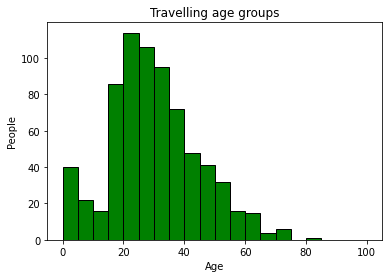

In [14]:
import matplotlib.pyplot as plt

bins_range = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

plt.hist(df["Age"], color='green', edgecolor='k', bins=bins_range)
plt.title("Travelling age groups")
plt.ylabel("People")
plt.xlabel("Age")
plt.show()

Most passengers are in 15-35 age range

### Survival depending on age

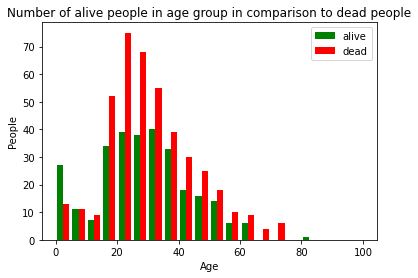

In [15]:
alive_age, dead_age = [], []

for idx, row in df.iterrows():
    if row["Survived"]:
        alive_age.append(row["Age"])
    else:
        dead_age.append(row["Age"])

p = plt.hist([alive_age, dead_age], 
             bins=bins_range, 
             label=["alive", "dead"],
             color=['green', 'red'])
plt.legend()
plt.title("Number of alive people in age group in comparison to dead people")
plt.ylabel("People")
plt.xlabel("Age")
plt.show()

c:\users\mateusz\anaconda3\envs\data_analytics\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


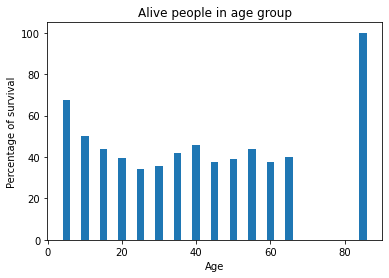

In [16]:
alive = p[0][0]
dead = p[0][1]
rate = (alive / (alive + dead)) * 100
bars = p[1][:-1] + 5

plt.bar(bars, rate, width=2)
plt.title("Alive people in age group")
plt.ylabel("Percentage of survival")
plt.xlabel("Age")
plt.show()

- Infants (0-5 years old) has high survival rate
- Oldest passengers (80 - 85 years old) survived
- Significant number of middle age people didn't survive

### Survival depending on sex

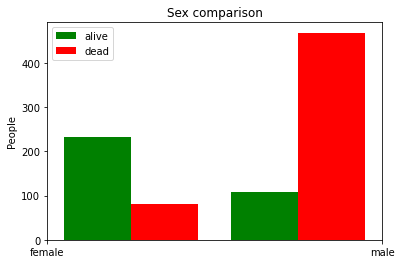

In [17]:
alive_sex, dead_sex = [], []

for idx, row in df.iterrows():
    if row["Survived"]:
        alive_sex.append(row["Sex"])
    else:
        dead_sex.append(row["Sex"])

p = plt.hist([alive_sex, dead_sex], 
             bins=2, 
             label=["alive", "dead"],
             color=['green', 'red'])
plt.legend()
plt.title("Sex comparison")
plt.ylabel("People")
plt.xticks(df["Sex"].unique())
plt.show()

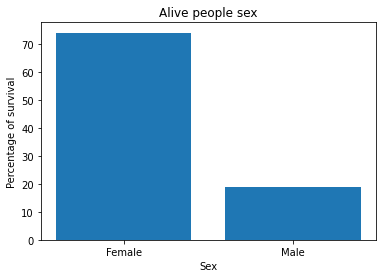

In [18]:
alive = p[0][0]
dead = p[0][1]
rate = (alive / (alive + dead)) * 100
bars = ["Female", "Male"]

plt.bar(bars, rate)
plt.title("Alive people sex")
plt.ylabel("Percentage of survival")
plt.xlabel("Sex")
plt.show()

In [95]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

Female has a very strong survival rate at 74% in comparison to male at 19%

### Survival depending on fare

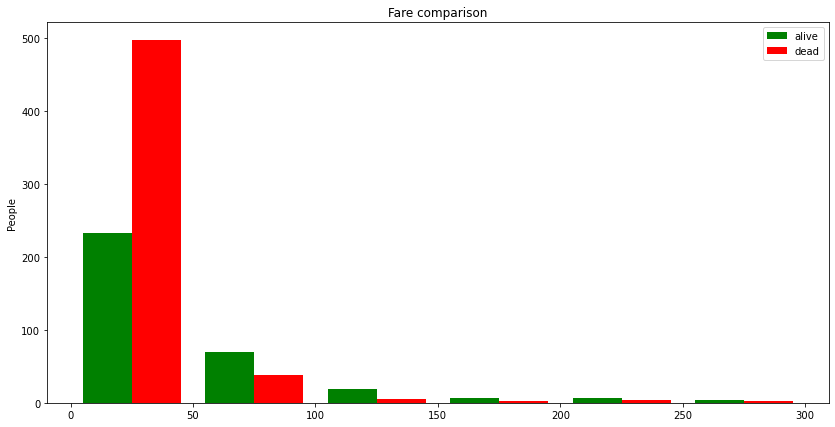

In [19]:
alive_fare, dead_fare = [], []

for idx, row in df.iterrows():
    if row["Survived"]:
        alive_fare.append(row["Fare"])
    else:
        dead_fare.append(row["Fare"])

plt.figure(figsize=(14, 7))
p = plt.hist([alive_fare, dead_fare], 
             bins=[0, 50, 100, 150, 200, 250, 300],
             label=["alive", "dead"],
             color=['green', 'red'])
plt.legend()
plt.title("Fare comparison")
plt.ylabel("People")
plt.show()

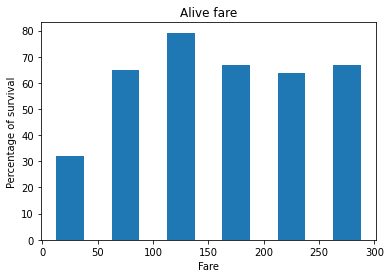

In [93]:
alive = p[0][0]
dead = p[0][1]
rate = (alive / (alive + dead)) * 100
bars = p[1][:-1] + 25

plt.bar(bars, rate, width=25)
plt.title("Alive fare")
plt.ylabel("Percentage of survival")
plt.xlabel("Fare")
plt.show()

Higher fare paying passengers had better survival

### Survival depending on class

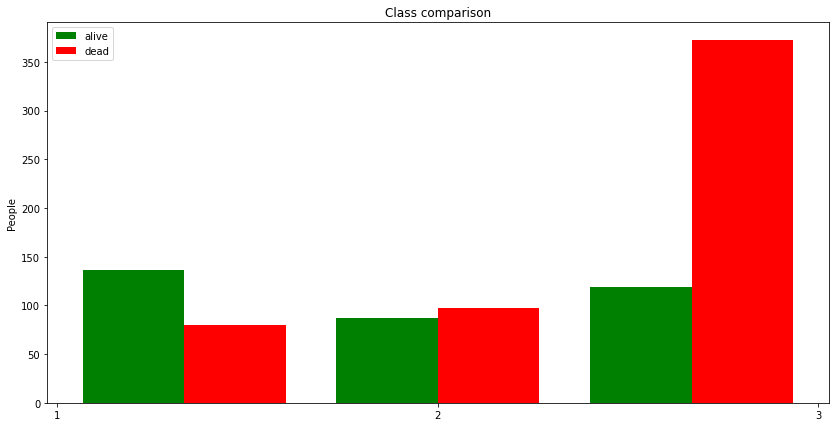

In [77]:
alive_class, dead_class = [], []

for idx, row in df.iterrows():
    if row["Survived"]:
        alive_class.append(row["Pclass"])
    else:
        dead_class.append(row["Pclass"])

plt.figure(figsize=(14, 7))
p = plt.hist([alive_class, dead_class], 
             bins=3,
             label=["alive", "dead"],
             color=['green', 'red'])
plt.legend()
plt.title("Class comparison")
plt.xticks(df["Pclass"].unique())
plt.ylabel("People")
plt.show()


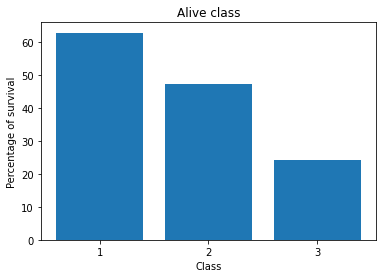

In [78]:
alive = p[0][0]
dead = p[0][1]
rate = (alive / (alive + dead)) * 100
bars = [1, 2, 3]

plt.bar(bars, rate)
plt.title("Alive class")
plt.ylabel("Percentage of survival")
plt.xlabel("Class")
plt.xticks(bars)
plt.show()

In [94]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

We can observe strong correlation among class (the best for 1 the worst for 3) and chances for survival

### Survival depending on embarked

c:\users\mateusz\anaconda3\envs\data_analytics\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\mateusz\anaconda3\envs\data_analytics\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


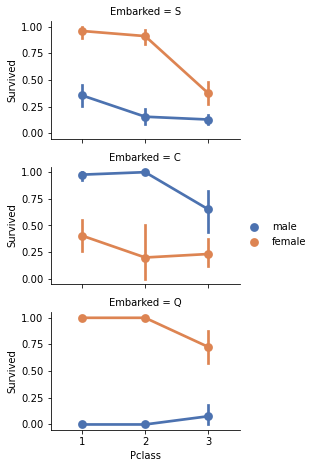

In [104]:
import seaborn as sns



- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

### Survival depending on titles

In [108]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [113]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Miss, Mrs) or did not (Mr, Rare).